## Lecture 13, In-Class Illustration: Solving linear higher-order equations

We have been developing approaches to solving ordinary differential equations.  In this exercise, we'll illustrate a powerful approach that will let us find all possible solutions to a linear ODE.

In [38]:
# before we get started, let's import some useful functions
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
from numpy import arange,sin,cos,power,ones,zeros,diff

Let's imagine that we have a block on a spring and that we pull on the spring at a speed $v$.  The block moves in response to the force of the spring, but it is also resisted by a frictional force on the bottom of the block, which has magnitude $F_{fric}$.  The location of the block $y$ can therefore be determined by 

$$m \frac{d^2 y}{dt^2} + k (y-vt) = F_{fric}.$$

We are going to find all possible the block can oscillate given this forcing: all the solutions to the equation above.

This equation is linear because we can write it in the form

$$a_2(t) \frac{d^2y}{dt^2} + a_1(t) \frac{dy}{dt} + a_0 y = f(t),$$

where 

$$a_2(t) = m$$
$$a_1(t) = 0$$
$$a_0(t) = k$$
$$f(t) = F_{fric}+kvt$$

When we can write an equation in this form, we commonly say that the function $y$ is being acted on by a linear operator $L$, so that

$$L y = a_2(t) \frac{d^2y}{dt^2} + a_1(t) \frac{dy}{dt} + a_0 y$$

Or in our case

$$L y = m \frac{d^2 y}{dt^2} + k y.$$

<br><br>
We can now rewrite our task.  We wish to find all possible solutions to the equation

$$m \frac{d^2 y}{dt^2} + k y = F_{fric}+kvt$$


$$L y = F_{fric}+kvt.$$

<br><br><br>
Maybe we should start, however, by finding _one_ solution to the equation $Ly = F_{fric}$.  I'll use a bit of inspired guesswork and guess that  one solution is

$$y_P(t) = \cos\left(t\sqrt{\frac{k}{m}} \right) + \frac{F_{fric}}{k} + vt.$$

To check, we can also compute $Ly_P$:

$$Ly_p =  m\frac{d^2y_P}{dt^2} + ky_P = -m \left(\frac{k}{m}\right)\cos\left(t\sqrt{\frac{k}{m}} \right)
+k \cos\left(t\sqrt{\frac{k}{m}} \right) + k \frac{F_{fric}}{k} +kvt = F_{fric} + kvt.$$

Let's go ahead and plot this _particular solution_ $y_P$ as well as $Ly_P$ below.  Here I've picked some arbitrary values for the constants $k$, $m$, and $F_{fric}$.

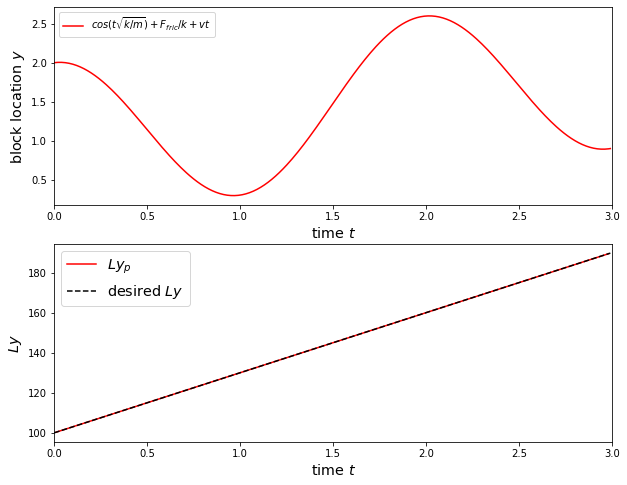

In [44]:
# choose some values for the stiffness k, mass m, and frictional force Ffric
# spring stiffness (N/m)
k=100
# mass (kg)
m=10
# frictional force (N)
Ffric=100
# pulling speed (m/s)
v=.3

# pick a set of times (sec)
t=arange(0,3,0.01)

# compute the block location at these times
yp=cos((k/m)**.5*t) + Ffric/k + v*t

# also compute Ly 
# here we'll compute Ly numerical
# note that diff(y,n=2)/dtim gives the second derivative of y
Lyp = m*diff(yp,n=2)/0.01**2 + k*yp[1:-1]

# the second derivative in Lyp is only computed at some of the times,
# so we have to use a different set of times for plotting
tLy = t[1:-1]

# and note the desired value of Ly
Lydes = Ffric+k*v*t

f,p = plt.subplots(2,figsize=(10,8))

# plot yp through time
p[0].plot(t,yp,color='red',label='$cos(t\sqrt{k/m})+F_{fric}/k + vt$')
p[0].set_ylabel('block location $y$',fontsize='x-large');
p[0].set_xlabel('time $t$',fontsize='x-large');
p[0].set_xlim([0,3]);
p[0].legend();

# plot Lyp
p[1].plot(tLy,Lyp,color='red',label='$Ly_p$');

# and the desired Ly
p[1].plot(t,Lydes,color='black',linestyle='--',label='desired $Ly$');

p[1].set_ylabel('$Ly$',fontsize='x-large')
p[1].set_xlabel('time $t$',fontsize='x-large');
p[1].legend(fontsize='x-large');
p[1].set_xlim([0,3]);


The solution we've guessed thus seems to work.  

Q1: But can you guess another solution that would also satisfy $Ly= F_{fric} + kvt$?

<br><br><br>

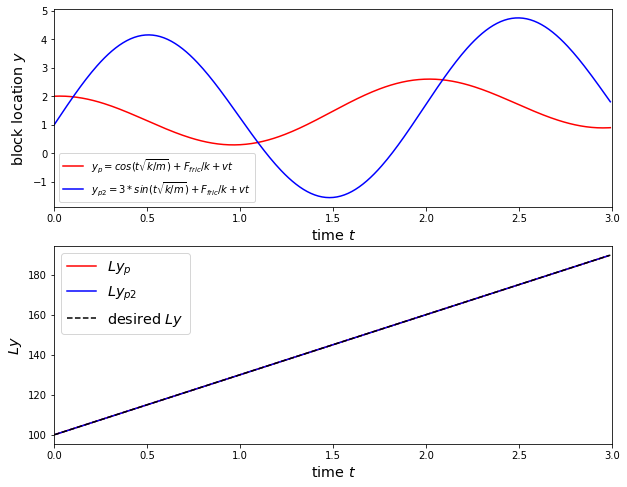

In [46]:
# compute the block location at these times
# for a different possible solution
yp2=3*sin((k/m)**.5*t) + Ffric/k + v*t

# also compute Ly for y=y_p2
Lyp2 = m*diff(yp2,n=2)/0.01**2 + k*yp2[1:-1]

# and note the desired value of Ly
Lydes = Ffric+k*v*t

f,p = plt.subplots(2,figsize=(10,8))

# plot yp through time
p[0].plot(t,yp,color='red',label='$y_p = cos(t\sqrt{k/m})+F_{fric}/k + vt$')
p[0].plot(t,yp2,color='blue',label='$y_{p2} = 3*sin(t\sqrt{k/m})+F_{fric}/k + vt$')


p[0].set_ylabel('block location $y$',fontsize='x-large');
p[0].set_xlabel('time $t$',fontsize='x-large');
p[0].set_xlim([0,3]);
p[0].legend();

# plot Lyp
p[1].plot(tLy,Lyp,color='red',label='$Ly_p$');
p[1].plot(tLy,Lyp2,color='blue',label='$Ly_{p2}$');

# and the desired Ly
p[1].plot(t,Lydes,color='black',linestyle='--',label='desired $Ly$');

p[1].set_ylabel('$Ly$',fontsize='x-large')
p[1].set_xlabel('time $t$',fontsize='x-large');
p[1].legend(fontsize='x-large');
p[1].set_xlim([0,3]);


So then we can quickly see that there is more than one possible solution, and we'd like to identify all possible solutions.  Let's try thinking of the range of possible solutions as the sum of our particular solution $y_P$ and some other (as yet unknown) function that we'll call $y_C$:

$$y = y_P + y_C$$

And let's compute $L(y_P + y_C)$:

$$L (y_P+y_C) = L (y_P + y_C)= m\frac{d^2}{dt^2}(y_P + y_C) + k (y_P + y_C)$$

$$L (y_P + y_C) = \frac{d^2}{dt^2}(y_P) + k (y_P)  + \frac{d^2}{dt^2}( y_C) + k (y_C)$$

$$L (y_P + y_C) = Ly_P + Ly_C $$

$$L (y_P + y_C) = F_{fric} + kvt + Ly_C $$

Where we've taken advantage of the associative property of derivatives, and in the last line, we noted that $Ly_P = F_{fric} + kvt$.

<br><br>
Q2: If you want the function $y_P + y_C$ to satisfy our original equation and give $L(y_P + y_C) = F_{fric} + kvt$, what should $Ly_C$ be?

<br><br><br>

We now want to find all possible $y_C$: the solutions to the _homogeneous equation_ $L y = 0$.  These are called the _complementary_ solutions to the _inhomogeneous_ equation $Ly = F_{fric}+kvt$.

$$ L y = 0$$

$$m\frac{d^2y}{dt^2} + ky = 0 $$

For now, we'll just guess two independent solutions:

$$y_{C1} = \cos\left(t\sqrt{\frac{k}{m}}\right)$$

$$y_{C2} = \sin\left(t\sqrt{\frac{k}{m}}\right)$$

And we can check that these satisfy $Ly_c = 0$:

$$L y_{C1} =m\frac{d^2y_{C1}}{dt^2} + ky_{C1} = -\frac{k}{m} m \cos\left(t\sqrt{\frac{k}{m}}\right) + k \cos\left(t\sqrt{\frac{k}{m}}\right) = 0$$

$$L y_{C2} =m\frac{d^2y_{C2}}{dt^2} + ky_{C2}= -\frac{k}{m} m \sin\left(t\sqrt{\frac{k}{m}}\right) + k \sin\left(t\sqrt{\frac{k}{m}}\right) = 0$$

<br>
Note that $y_{C1}$ and $y_{C2}$ are called _independent_ because there is no scalar $A$ that can make $y_{C1} = A y_{C2}$.  You can't multiply sine by a scalar and get sine.

<br><br>
Our prediction from above, however, implies that we should be able to create solutions to the equation $Ly=F_{fric} + kvt$ by combining our complementary solutions $y_{C1}$ and $y_{C2}$ with the particular solution $y_{P}$, using any scalars $A$ and $B$:

$$y = y_P + A y_{C1} + B y_{C2}$$

This combination is referred to as the general solution of $Ly=f$.  Let's plot some combinations below and see how they work.


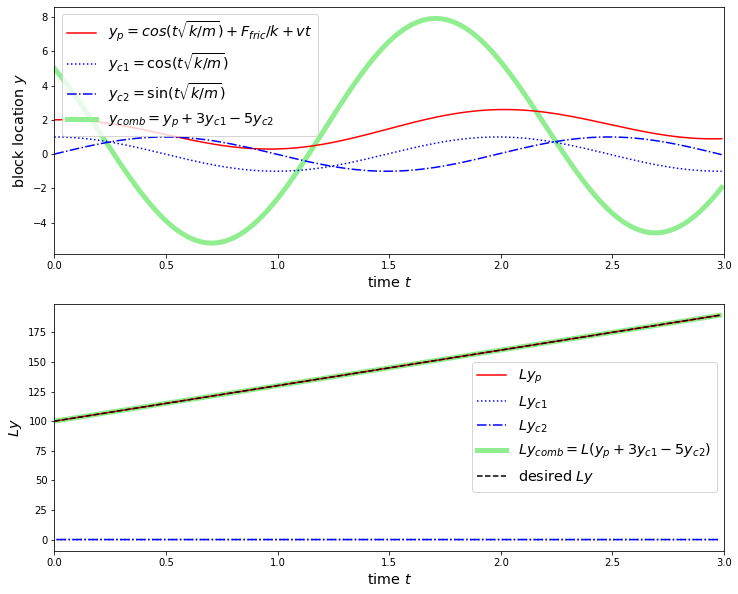

In [58]:
# compute the block location for the complementary solutions
yc1=cos((k/m)**.5*t)
yc2=sin((k/m)**.5*t)

#---------BEGINNING OF LINES YOU CAN TRY MODIFYING-------
# here we specify a combination of the particular and complementary solutions

# I've chosen to compute yp + 3 times yc1 - 5 times yc2
# But you might instead compute yp + 5 * yc1 + 10 * yc2
# If you do that, you should change the ycomb_label to 
# 'y_p + 5 y_{c1} + 10 y_{c2}'

# compute a combination of yp, yc1, and yc2
ycomb = yp + 3*yc1 - 5*yc2

# for labelling
ycomb_label = 'y_p + 3 y_{c1} - 5 y_{c2}'

#---------END OF LINES YOU CAN TRY MODIFYING--------------


# also compute Ly for the complementary solutions
# again, we're computing the second derivative numerically
# note that diff(y,n=2)/dtim gives the second derivative of y
Lyc1 = m*diff(yc1,n=2)/0.01**2 + k*yc1[1:-1]
Lyc2 = m*diff(yc2,n=2)/0.01**2 + k*yc2[1:-1]

# finally, compute Ly for the combined solution (one of the general solutions)
Lycomb = m*diff(ycomb,n=2)/0.01**2 + k*ycomb[1:-1]


f,p = plt.subplots(2,figsize=(12,10))

# plot y through time
# y_p: the particular solution
p[0].plot(t,yp,color='red',label='$y_p=cos(t\sqrt{k/m})+F_{fric}/k + vt$')

# y_c1 and y_c2: the complementary solutions
p[0].plot(t,yc1,color='blue',label='$y_{c1}=\cos(t\sqrt{k/m})$',linestyle=':')
p[0].plot(t,yc2,color='blue',label='$y_{c2}=\sin(t\sqrt{k/m})$',linestyle='-.')

# a combination of y_p and the y_c's
p[0].plot(t,ycomb,color='lightgreen',label='$y_{comb}='+ycomb_label+'$',
                  linewidth=5,zorder=0);


p[0].set_ylabel('block location $y$',fontsize='x-large');
p[0].set_xlabel('time $t$',fontsize='x-large');
p[0].set_xlim([0,3]);
p[0].legend(fontsize='x-large');

# plot Lyp
p[1].plot(tLy,Lyp,color='red',label='$Ly_p$');
p[1].plot(tLy,Lyc1,color='blue',label='$Ly_{c1}$',linestyle=':');
p[1].plot(tLy,Lyc2,color='blue',label='$Ly_{c2}$',linestyle='-.');
p[1].plot(tLy,Lycomb,color='lightgreen',label='$Ly_{comb}=L('+ycomb_label+')$',
              linewidth=5,zorder=0);



# and the desired Ly
p[1].plot(t,Lydes,color='black',linestyle='--',label='desired $Ly$');

p[1].set_ylabel('$Ly$',fontsize='x-large')
p[1].set_xlabel('time $t$',fontsize='x-large');
p[1].legend(fontsize='x-large');
p[1].set_xlim([0,3]);

So now we have verified that the solution 
$$y=y_p + 3y_{c1} - 5y_{c2} = 4\cos\left(t\sqrt{\frac{k}{m}} \right) +
-5\sin\left(t\sqrt{\frac{k}{m}} \right) + \frac{F_{fric}}{k} + vt$$

satifies the equation $$Ly=m\frac{d^2y}{dt^2} + ky = F_{fric}+kvt.$$  

It is one physically possible solution for the oscillating location of a block being pulled on a spring.
<br><br><br><br><br>

Q3: Do you think the solution 
$$y=y_p -2 y_{c1} +8.5 y_{c2} = -\cos\left(t\sqrt{\frac{k}{m}} \right) +
+8.5\sin\left(t\sqrt{\frac{k}{m}} \right) + \frac{F_{fric}}{k} + vt$$
will satisfy $Ly=m\frac{d^2y}{dt^2} + ky = F_{fric}+kvt$?  Try modifying the second and third lines of code in the cell above to check.

Change      _ycomb = yp + 3 \* yc1 - 5 \* yc2_  to 
 _ycomb = yp - 2 \* yc1 + 8.5 \* yc2_  to compute a different value for the combined solution ycomb.  

Change  _ycomb_label = 'y_p + 3 y_{c1} - 5 y_{c2}'_ to 
_ycomb_label = 'y_p - 2 y_{c1} + 8.5 y_{c2}'_ to change the labelling.



<br><br><br><br><br><br>

Q4: Do you think the solution 
$$y=2y_p +3 y_{c1} -5 y_{c2} = 5\cos\left(t\sqrt{\frac{k}{m}} \right) +
-5\sin\left(t\sqrt{\frac{k}{m}} \right) + 2\frac{F_{fric}}{k} + 2vt$$
will satisfy $Ly=m\frac{d^2y}{dt^2} + ky = F_{fric}+kvt$?  Try modifying the second and third lines of code in the cell above to check.

<br><br><br><br><br><br>
